# Time series forecasting fundamentals with TensorFlow + Milestone Project 3: BitPredict 💰📈

Let's write some TensorFlow code to predict. the price of Bitcoin based on the historycal price of Bitcoin.

⚠️ **Note**: This is not financial advice.


## Get data

We're going to be using the historical price data of Bitcoin to try and predict the future price of Bitcoin.

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-09-17 14:14:15--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2023-09-17 14:14:15 (9.08 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



## Importing time series with pandas

In [ ]:
# Import with pandas
import pandas as pd

# Let's read in our Bitcoin data and parse the dates
df = pd.read_csv("/content/BTC-USD (1).csv",
                 parse_dates=["Date"],
                 index_col=["Date"]) # Parse the Date column and set it as the index

# Drop the "Adj Close" and "Volume" columns
df = df.drop(columns=["Adj Close", "Volume"])

# Add a new "Currency" column with the value "BTC" after the "Date" column
df.insert(0, "Currency", "BTC")

# Print the updated DataFrame
df.head()

,Currency,Open,High,Low,Close
Date,,,,,
2014-09-17,BTC,465.864014,468.174011,452.421997,457.334015
2014-09-18,BTC,456.859985,456.859985,413.104004,424.440002
2014-09-19,BTC,424.102997,427.834991,384.532013,394.795990
2014-09-20,BTC,394.673004,423.295990,389.882996,408.903992
2014-09-21,BTC,408.084991,412.425995,393.181000,398.821014


In [ ]:
df.tail()

,Currency,Open,High,Low,Close
Date,,,,,
2023-09-04,BTC,25968.169922,26081.525391,25657.025391,25812.416016
2023-09-05,BTC,25814.957031,25858.375000,25589.988281,25779.982422
2023-09-06,BTC,25783.931641,25953.015625,25404.359375,25753.236328
2023-09-07,BTC,25748.312500,26409.302734,25608.201172,26240.195313
2023-09-08,BTC,26238.873047,26391.982422,25729.128906,25848.972656


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3279 entries, 2014-09-17 to 2023-09-08
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Currency  3279 non-null   object 
 1   Open      3279 non-null   float64
 2   High      3279 non-null   float64
 3   Low       3279 non-null   float64
 4   Close     3279 non-null   float64
dtypes: float64(4), object(1)
memory usage: 153.7+ KB


In [ ]:
# How many samples do we have?
len(df)

3279

We've collected the historical price of Bitcoin for the past ~9 years but htere's 3279 samples.

Typically deep learning models usually like lots and lots and lots of samples (where lots and lots and lots can thousands to tens of thousands to millions).

A smaller number of samples is something you'll often run into with time series data problems.

> 🔑 **Note**: The **seasonality** of a timne series dataset is referred as the numebr of samples per year. So for our Bitcoin data, it has a seasonaluty of daily or value of 365 beacause we collect one sample per day meaning we'll get 365 samples per year.

In [ ]:
# Only want closing price for each day
bitcoin_prices = pd.DataFrame(df["Close"]).rename(columns={"Close": "Price"})
bitcoin_prices.head()

,Price
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014


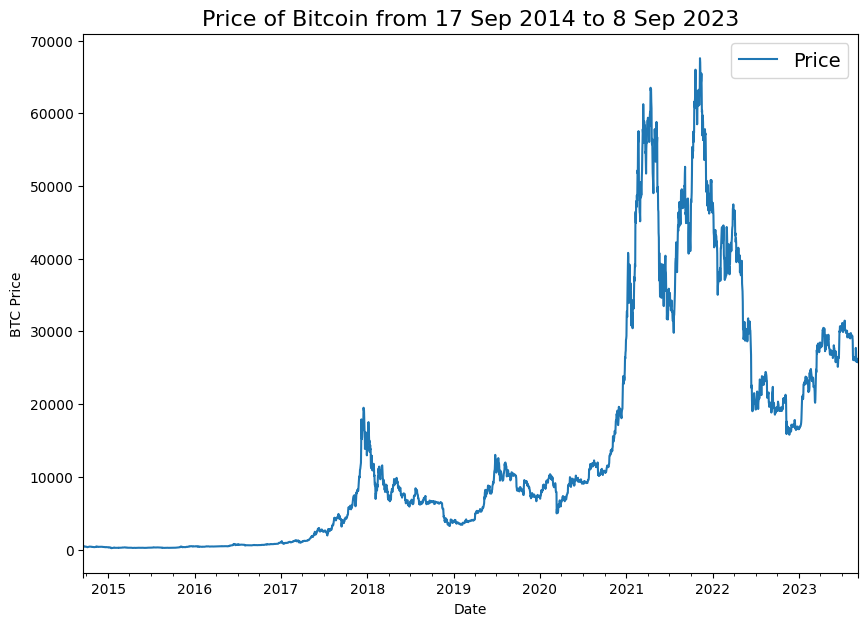

In [ ]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 17 Sep 2014 to 8 Sep 2023", fontsize=16)
plt.legend(fontsize=14);

## Importing time series data with Python's CSV module

In [ ]:
# Importing and formating historical Bitcoin data with Python
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("/content/BTC-USD (1).csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",")
  next(csv_reader) # skip first line (this gets rid of the column titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[0], "%Y-%m-%d")) # get the dates as dates (not strings)
    btc_price.append(float(line[4])) # get the closing price as float

# View first 10 of each
timesteps[:10], btc_price[:10]

([datetime.datetime(2014, 9, 17, 0, 0),
  datetime.datetime(2014, 9, 18, 0, 0),
  datetime.datetime(2014, 9, 19, 0, 0),
  datetime.datetime(2014, 9, 20, 0, 0),
  datetime.datetime(2014, 9, 21, 0, 0),
  datetime.datetime(2014, 9, 22, 0, 0),
  datetime.datetime(2014, 9, 23, 0, 0),
  datetime.datetime(2014, 9, 24, 0, 0),
  datetime.datetime(2014, 9, 25, 0, 0),
  datetime.datetime(2014, 9, 26, 0, 0)],
 [457.334015,
  424.440002,
  394.79599,
  408.903992,
  398.821014,
  402.152008,
  435.790985,
  423.204987,
  411.574005,
  404.424988])

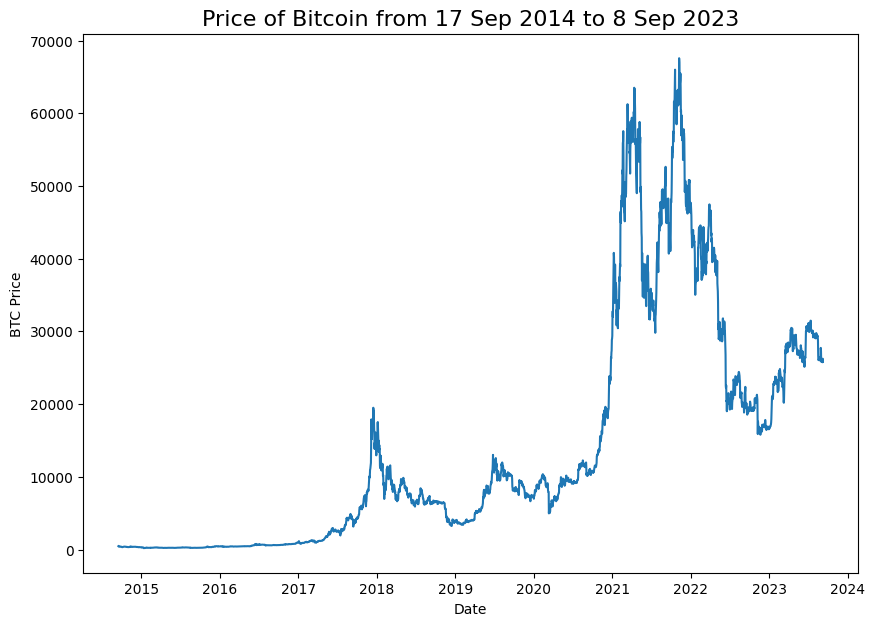

In [ ]:
# Plot from CSV
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 7))
plt.plot(timesteps, btc_price)
plt.title("Price of Bitcoin from 17 Sep 2014 to 8 Sep 2023", fontsize=16)
plt.ylabel("BTC Price")
plt.xlabel("Date");

## Format data part 1: Create train and test sets of our time series data

### Creating train and test sets with time series data (the wrong way)

In [ ]:
bitcoin_prices[:5]

,Price
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014


In [ ]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2014-09-17T00:00:00.000000000', '2014-09-18T00:00:00.000000000',
        '2014-09-19T00:00:00.000000000', '2014-09-20T00:00:00.000000000',
        '2014-09-21T00:00:00.000000000', '2014-09-22T00:00:00.000000000',
        '2014-09-23T00:00:00.000000000', '2014-09-24T00:00:00.000000000',
        '2014-09-25T00:00:00.000000000', '2014-09-26T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([457.334015, 424.440002, 394.79599 , 408.903992, 398.821014,
        402.152008, 435.790985, 423.204987, 411.574005, 404.424988]))

In [ ]:
# Worng way to make train/test sets for time series data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps, # dates
                                                    prices, # BTC prices
                                                    test_size=0.2,
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2623,), (656,), (2623,), (656,))

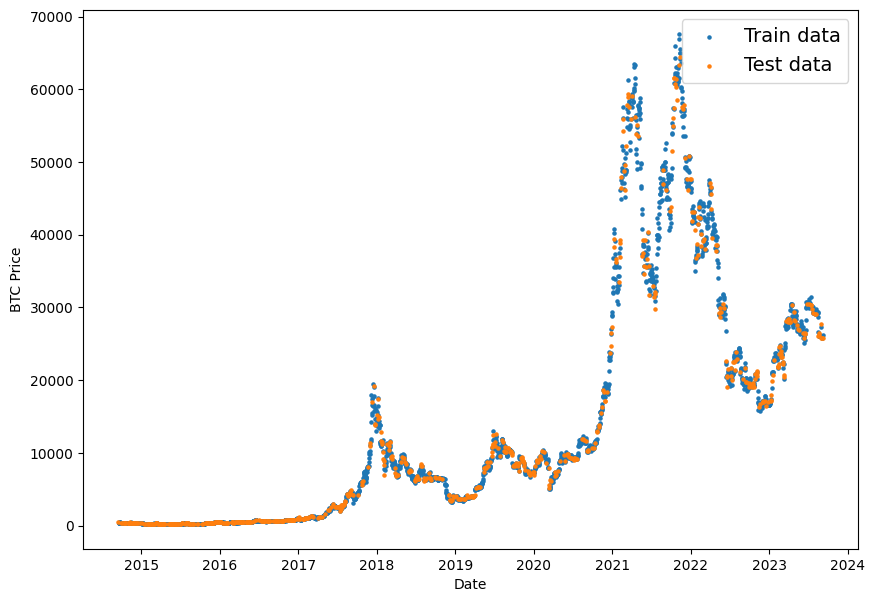

In [ ]:
# Let's plot wrong train and test splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

### Create train & test sets for time series (the right way)

In [ ]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything after the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2623, 656, 2623, 656)

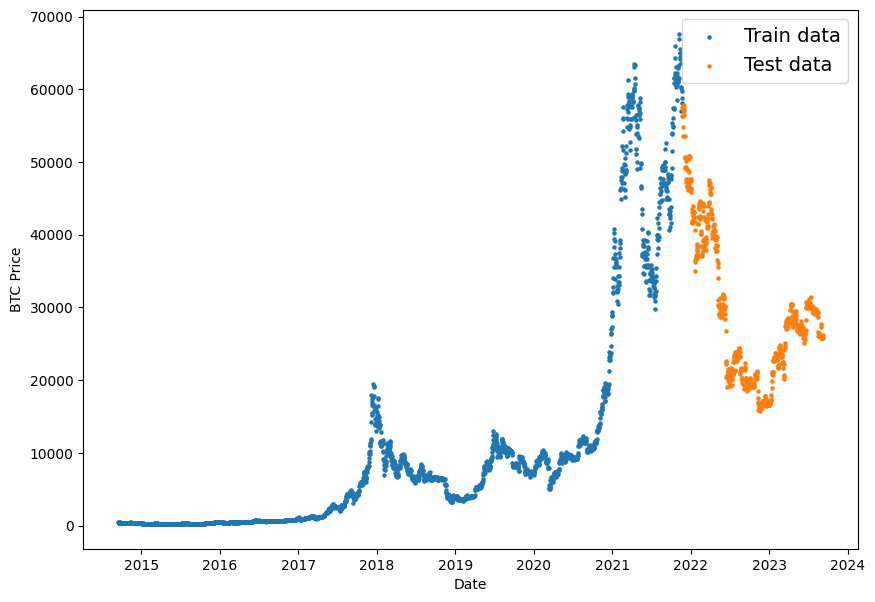

In [ ]:
# Plot correctly made splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

## Create a plotting function

Typing plotting code is tedious, let's functionize it.

In [ ]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
  """
  Plots tiemsteps (a series of points in time) against values (a series of values across timesteps)

  Parameters
  ----------
  timesteps : array of timestep values
  values: array if values across time
  format: style of plot, default "."
  start : where to start a plot (setting a value will index from strat of timesteps & values)
  end : where to end the plot (similar to start but for the end)
  label : label to show on plot about values, default None
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

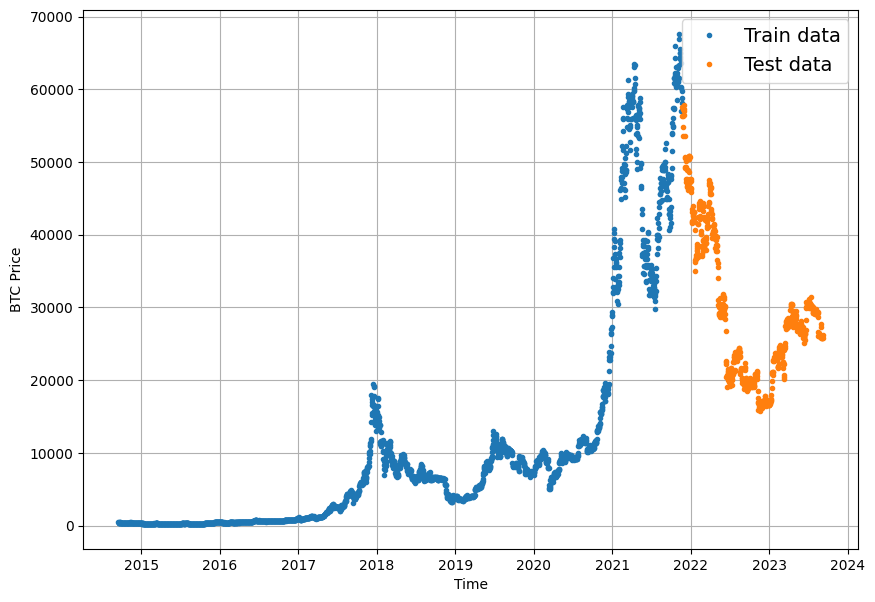

In [ ]:
# Test out plotting function
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

## Modeling Experiments

We've got some Bitcoin historical data, to model it, let's run a series of modelling experiments and see which model performs best.

Terms to be familiar with:
* **Horizon** = numebr of timesteps into the future we're going to predict
* **Window size** = number of timesteps we're goint to use to predict **horizon**

Modelling experiments we're running:
* 0 Naїve model (baseline)
* 1 Dense model, horizon = 1, window = 7
* 2 Same as 1, horizon = 1, window = 30
* 3 Same as 1, horizon =7, window = 30
* 4 Conv1D
* 5 LSTM
* 6 Same as 1 (but with multivariate data)
* 7 N-BEATs Algorithm
* 8 Ensemble (multiple models optimized on defferent loss functions)
* 9 Future prediction model (model to predict future values)
* 10 Same as 1 (but with turkey 🦃 data introduced)

## Model 0: Naїve forecast (baseline)

The formula look like this:

$$\hat{y}_{t} = y_{t-1}$$

In English:

> The prediction at timestep t (y-hat) is equal to the value at timestep t-1 (previous timestep) - this is for a horizon of 1.

In [ ]:
y_test[:10]

array([56289.289063, 57569.074219, 56280.425781, 57274.679688,
       53569.765625, 54815.078125, 57248.457031, 57806.566406,
       57005.425781, 57229.828125])

In [ ]:
# Create a naïve forecast
naive_forecast = y_test[:-1] # Naïve forecast equals every value excluding the last value
naive_forecast[:10], naive_forecast[-10:] # View frist 10 and last 10

(array([56289.289063, 57569.074219, 56280.425781, 57274.679688,
        53569.765625, 54815.078125, 57248.457031, 57806.566406,
        57005.425781, 57229.828125]),
 array([27727.392578, 27297.265625, 25931.472656, 25800.724609,
        25868.798828, 25969.566406, 25812.416016, 25779.982422,
        25753.236328, 26240.195313]))

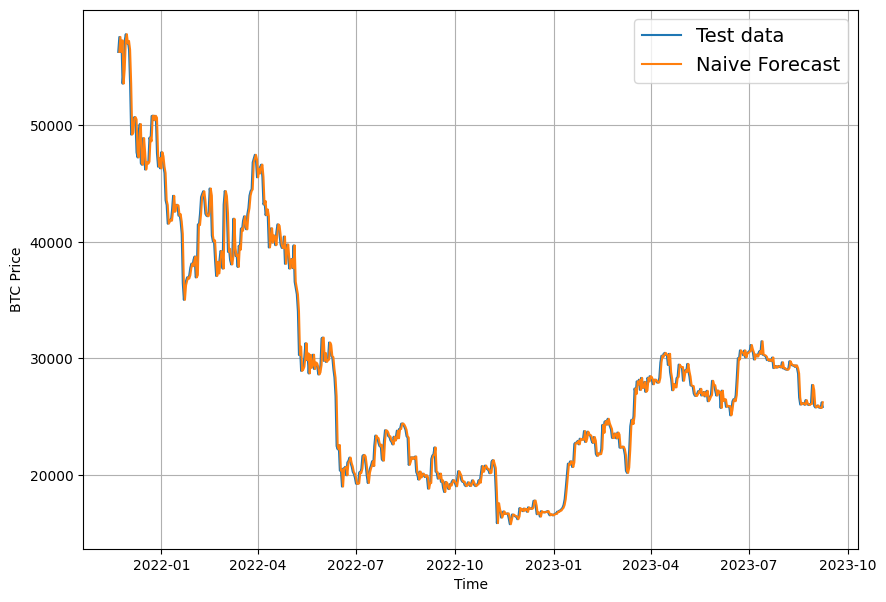

In [ ]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
# plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, format="-", label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive Forecast")

### Evaluating a time series model

Let's look into some evaluation metrics for time series forecasting.

What are we doing?

We're predicting a number, so that means we have a form of a regression problem.

Beacause we're working on a regression problem, we'll need some regressionlike metrics.

A few common regression metrics (which can also be used for time series forecasting):
* MAE - mean absolute error
* MSE - mean squared error
* RMSE - room mean square error
* MAPE/sMAPE - (symmetric) mean absolute percentage error
* MASE - mean absolute scaled error

For all of the above metrics, **lower is better**, for example, an MAE of 0 that is better than an MAE of 100.

The main thing we're evaluating here is: **how do our model's forecasts (y_pred) compare against the actual values (y_true or ground truth values)?**

In [ ]:
import tensorflow as tf

In [ ]:
# MASE implementation
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shift of 1)

  return mae / mae_naive_no_season

In [ ]:
# Test MASE (this value should = 1 or be very close to 1 with the naive forecast)
mean_absolute_scaled_error(y_true=y_test[1:], y_pred=naive_forecast).numpy()

1.0017714436943297

In [ ]:
# Create a function to take in model predictions and truth values and return evaluation metrics
def evaluate_preds(y_true, y_pred):
  # Make sure float32 datatype (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various evaluation metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

That's one good looking evaluation function!

Let's now see if it works...

In [ ]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 593.4614,
 'mse': 879353.06,
 'rmse': 937.7382,
 'mape': 2.0068219,
 'mase': 1.0017713}

In [ ]:
tf.reduce_mean(y_test).numpy()

28871.212667397864

In [ ]:
tf.reduce_min(y_test), tf.reduce_max(y_test)

(<tf.Tensor: shape=(), dtype=float64, numpy=15787.28418>,
 <tf.Tensor: shape=(), dtype=float64, numpy=57806.566406>)

## Other models you can use for baseline and for actual forecast

In this notebook, we're. focused on TensorFlow and deep learning models

## Format Data Part 2: Windowing our dataset

Why do we window?

We window our time series dataset to turn our data into a supervised learning problem.

```
Windowing for one week
[0, 1, 2, 3, 4, 5, 6] -> [7]
[1, 2, 3, 4, 5, 6, 7] -> [8]
[2, 3, 4, 5, 6, 7, 8] -> [9]
```

In [ ]:
btc_price[:8]

[457.334015,
 424.440002,
 394.79599,
 408.903992,
 398.821014,
 402.152008,
 435.790985,
 423.204987]

In [ ]:
# What we want to do with our Bitcoin data
print(f"we want to use: {btc_price[:7]} to predit this: {btc_price[7]}")

we want to use: [457.334015, 424.440002, 394.79599, 408.903992, 398.821014, 402.152008, 435.790985] to predit this: 423.204987


In [ ]:
# Let's setup global variables for window and horizen size
HORIZON = 1 # predict next 1 day
WINDOW_SIZE = 7 # use the past week of Bitcoin data to make the prediction

In [ ]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=HORIZON):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1
  Input: [0, 1, 2, 3, 4, 5, 6, 7] -> Output: ([0, 1, 2, 3, 4, 5, 6], [7])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [ ]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0))
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


We've got a way to label our windowed data.

However, this only works on a small scale.

We need a way to do the above across our entire time series.

We could do this with Python for loops, however, for large time series, that'd be quite slow.

To speed things up, we'll leverage Numpy's array indexing.

Our function will:
1. Create a window steps of specific window size (e.g. [0, 1, 2, 3, 4, 5, 6])
2. Use NumPy imdexing to create a 2D array of multiple window steps, for example:
```
[[0, 1, 2, 3, 4, 5, 6],
[1, 2, 3, 4, 5, 6, 7],
[2, 3, 4, 5, 6, 7, 8]]
```
3. Uses the 2D array of multiple window steps (from 2.) to index on a target series (e.g. the historical price of Bitcoin)
4. Uses our `get_labelled_windows()` function we created above to turn the window steps into windows with a specified horizon.

In [ ]:
import numpy as np

# Create function to view NumPy arrays as windows
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
  """
  Turns a 1D array into a 2D array of sequential labelled windows of window size with horizon size labels.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for labelling later)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"WIndow indexes:\n {window_indexes, window_indexes.shape}")

  # 3. Index on the target array (a time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]
  # print(windowed_array)

  # 4. Get the labelleb windows
  windows, labels = get_labelled_windows(windowed_array, horizon=HORIZON)
  return windows, labels

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(3272, 3272)

In [ ]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [457.334015 424.440002 394.79599  408.903992 398.821014 402.152008
 435.790985] -> Label: [423.204987]
Window: [424.440002 394.79599  408.903992 398.821014 402.152008 435.790985
 423.204987] -> Label: [411.574005]
Window: [394.79599  408.903992 398.821014 402.152008 435.790985 423.204987
 411.574005] -> Label: [404.424988]


In [ ]:
# View the last 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [27297.265625 25931.472656 25800.724609 25868.798828 25969.566406
 25812.416016 25779.982422] -> Label: [25753.236328]
Window: [25931.472656 25800.724609 25868.798828 25969.566406 25812.416016
 25779.982422 25753.236328] -> Label: [26240.195313]
Window: [25800.724609 25868.798828 25969.566406 25812.416016 25779.982422
 25753.236328 26240.195313] -> Label: [25848.972656]


>🔑 **Note**: You can find a function which achives similar results to the ones we implemented above `tf.keras.preprocessing.timeseries_dataset_from_array()`. Just like ours, it takes in an array and returns a windowed dataset. It has the benefit of returning data in the form of a `tf.data.Dataset` instance (we'll see how to do this with our own data later).

## Turning windows into training and test sets

In [ ]:
full_windows[:5], full_labels[:5]

(array([[457.334015, 424.440002, 394.79599 , 408.903992, 398.821014,
         402.152008, 435.790985],
        [424.440002, 394.79599 , 408.903992, 398.821014, 402.152008,
         435.790985, 423.204987],
        [394.79599 , 408.903992, 398.821014, 402.152008, 435.790985,
         423.204987, 411.574005],
        [408.903992, 398.821014, 402.152008, 435.790985, 423.204987,
         411.574005, 404.424988],
        [398.821014, 402.152008, 435.790985, 423.204987, 411.574005,
         404.424988, 399.519989]]),
 array([[423.204987],
        [411.574005],
        [404.424988],
        [399.519989],
        [377.181   ]]))

In [ ]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels


In [ ]:
# Create train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2617, 655, 2617, 655)

In [ ]:
train_windows[:5], train_labels[:5]

(array([[457.334015, 424.440002, 394.79599 , 408.903992, 398.821014,
         402.152008, 435.790985],
        [424.440002, 394.79599 , 408.903992, 398.821014, 402.152008,
         435.790985, 423.204987],
        [394.79599 , 408.903992, 398.821014, 402.152008, 435.790985,
         423.204987, 411.574005],
        [408.903992, 398.821014, 402.152008, 435.790985, 423.204987,
         411.574005, 404.424988],
        [398.821014, 402.152008, 435.790985, 423.204987, 411.574005,
         404.424988, 399.519989]]),
 array([[423.204987],
        [411.574005],
        [404.424988],
        [399.519989],
        [377.181   ]]))

In [ ]:
test_windows[:5], test_labels[:5]

(array([[60161.246094, 60368.011719, 56942.136719, 58119.578125,
         59697.195313, 58730.476563, 56289.289063],
        [60368.011719, 56942.136719, 58119.578125, 59697.195313,
         58730.476563, 56289.289063, 57569.074219],
        [56942.136719, 58119.578125, 59697.195313, 58730.476563,
         56289.289063, 57569.074219, 56280.425781],
        [58119.578125, 59697.195313, 58730.476563, 56289.289063,
         57569.074219, 56280.425781, 57274.679688],
        [59697.195313, 58730.476563, 56289.289063, 57569.074219,
         56280.425781, 57274.679688, 53569.765625]]),
 array([[57569.074219],
        [56280.425781],
        [57274.679688],
        [53569.765625],
        [54815.078125]]))

In [ ]:
# Check to see if same (accounting for horizon and window size)
np.array_equal(np.squeeze(train_labels[:-HORIZON]), y_train[WINDOW_SIZE:])

True

## Make a modeling checkpoint callback

Because our model's performance will fluctuate from experiment to experiment, we're going to write a model checkpoint so we can compare apples to apples.

More specifically, we want to compare each of our model's best performances against the other model's best performances.

For example if our model performs the best on epoch 55 (but we're training for 100 epochs), we want to load and evaluate the model saved on epoch 55.

In [ ]:
import os

# Create a fucntion to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            monitor="val_loss",
                                            verbose=0, # only output unlimeted amount of text
                                            save_best_only=True)

## Model 1: Dense model (window = 7, horizon = 1)

Our first deep model is going to be a simple dense model:
* A single dense layer with 128 hidden units and ReLU
* An output layer with linear activation (no activation)
* Adam optimization and MAE loss function
* Batch size of 128 (previously we've used 32)
* 100 epochs

Why these values?

I picked them out of experimentation.

* **Hyperparameters** = values a machine learning practitioner (you!) can adjust themselves
* **Parameters** = values a model learn on its own

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(32)

# 1. Construct model
model_1 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation
], name="model_1_dense") # name our model so we can save it

# 2. Compile
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

# 3. Fit the model
model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
21/21 [==============================] - 10s 78ms/step - loss: 4223.1504 - mae: 4223.1504 - mse: 88987880.0000 - val_loss: 5297.9126 - val_mae: 5297.9126 - val_mse: 34955744.0000
Epoch 2/100
21/21 [==============================] - 1s 40ms/step - loss: 897.5869 - mae: 897.5869 - mse: 3990193.7500 - val_loss: 1767.2172 - val_mae: 1767.2172 - val_mse: 5381747.0000
Epoch 3/100
21/21 [==============================] - 1s 50ms/step - loss: 586.2784 - mae: 586.2784 - mse: 1796338.6250 - val_loss: 1134.2151 - val_mae: 1134.2151 - val_mse: 2771822.0000
Epoch 4/100
21/21 [==============================] - 1s 42ms/step - loss: 533.4319 - mae: 533.4319 - mse: 1498323.7500 - val_loss: 1081.6648 - val_mae: 1081.6648 - val_mse: 2542595.5000
Epoch 5/100
21/21 [==============================] - 1s 44ms/step - loss: 512.2650 - mae: 512.2650 - mse: 1347583.0000 - val_loss: 996.0376 - val_mae: 996.0376 - val_mse: 2219626.0000
Epoch 6/100
21/21 [==============================] - 0s 14ms/step -

In [ ]:
# Evaluate model in test data
model_1.evaluate(test_windows, test_labels)

21/21 [==============================] - 0s 2ms/step - loss: 750.1539 - mae: 750.1539 - mse: 1188272.5000


[750.1539306640625, 750.1539306640625, 1188272.5]

In [ ]:
# Load in saved best performing model_1 and evaluate it on test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense/")
model_1.evaluate(test_windows, test_labels)

21/21 [==============================] - 0s 2ms/step - loss: 614.9107 - mae: 614.9107 - mse: 922135.8125


[614.9107055664062, 614.9107055664062, 922135.8125]

## Making forecast with a model (on the test dataset)

To make "foredcast" on the test dataset (note: these won't be actual forecast, they're only psuedo forecast because actual forecast are into the future), let's write a function to:

1. Take in a train model
2. Takes in some input data (same kind of data the model was trained on)
3. Passes the input data to the model's `predict()` method
4. Returns the predictions

In [ ]:
def make_preds(model, input_data):
  """
  Uses model to make predictions input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [ ]:
# Make predictions using model_1 on the test dataset and view results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

21/21 [==============================] - 0s 2ms/step


(655,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([56650.97 , 56892.82 , 56428.67 , 56800.023, 54157.223, 53882.57 ,
        56973.453, 57316.66 , 57304.43 , 56938.555], dtype=float32)>)

In [ ]:
test_labels[:10]

array([[57569.074219],
       [56280.425781],
       [57274.679688],
       [53569.765625],
       [54815.078125],
       [57248.457031],
       [57806.566406],
       [57005.425781],
       [57229.828125],
       [56477.816406]])

In [ ]:
# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_1_preds)
model_1_results

{'mae': 614.91064,
 'mse': 922135.8,
 'rmse': 960.279,
 'mape': 2.0791087,
 'mase': 1.0379779}

In [ ]:
naive_results

{'mae': 593.4614,
 'mse': 879353.06,
 'rmse': 937.7382,
 'mape': 2.0068219,
 'mase': 1.0017713}

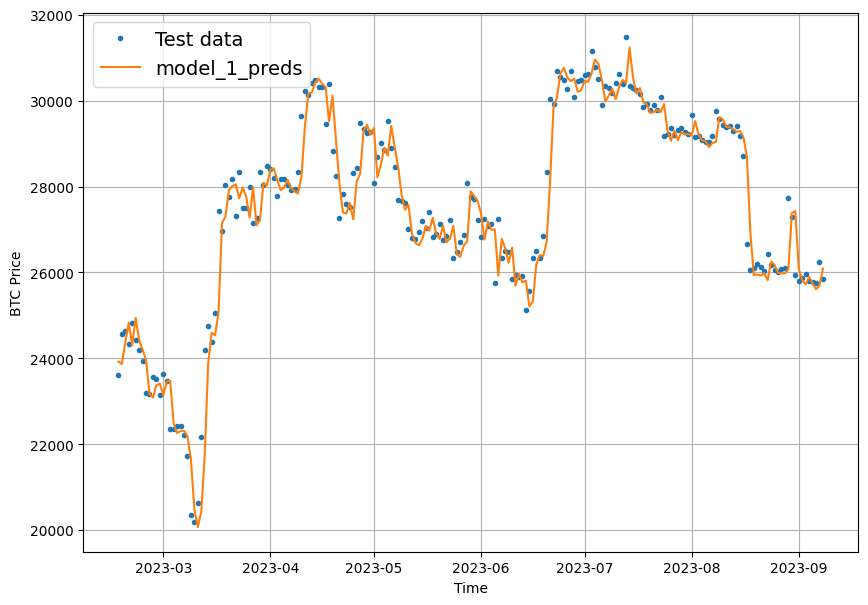

In [ ]:
# Let's plot our model 1 predictions
offset = 450
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 label="Test data")

plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_1_preds,
                 start=offset,
                 format="-",
                 label="model_1_preds")

## Model 2: Dense (window = 30, horizon = 1)

In [ ]:
HORIZON = 1 # predict one step at a time (one day of Bitcoin prices)
WINDOW_SIZE = 30 # use 30 timesteps in past

In [ ]:
# Make window data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(3249, 3249)

In [ ]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels,
                                                                                test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2599, 650, 2599, 650)

In [ ]:
tf.random.set_seed(42)

# Create model
model_2 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON, activation="linear")
], name="model_2_dense")

# Compile
model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                )

# Fit
model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=1,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

Epoch 1/100
21/21 [==============================] - 2s 42ms/step - loss: 3526.5105 - val_loss: 2563.3220
Epoch 2/100
21/21 [==============================] - 0s 7ms/step - loss: 1138.1248 - val_loss: 3227.2188
Epoch 3/100
21/21 [==============================] - 0s 7ms/step - loss: 846.4258 - val_loss: 2629.8362
Epoch 4/100
21/21 [==============================] - 1s 27ms/step - loss: 717.1918 - val_loss: 1230.0061
Epoch 5/100
21/21 [==============================] - 0s 21ms/step - loss: 638.8279 - val_loss: 1194.5677
Epoch 6/100
21/21 [==============================] - 0s 4ms/step - loss: 627.5308 - val_loss: 2262.4458
Epoch 7/100
21/21 [==============================] - 0s 20ms/step - loss: 602.9509 - val_loss: 1113.2069
Epoch 8/100
21/21 [==============================] - 0s 5ms/step - loss: 571.0364 - val_loss: 1361.9830
Epoch 9/100
21/21 [==============================] - 0s 5ms/step - loss: 575.7026 - val_loss: 1238.2618
Epoch 10/100
21/21 [==============================] - 0s 2

In [ ]:
# Evaluation model 2 on test data
model_2.evaluate(test_windows, test_labels)

21/21 [==============================] - 0s 2ms/step - loss: 840.0698


840.06982421875

In [ ]:
# Load in best performing model
model_2 = tf.keras.models.load_model("/content/model_experiments/model_2_dense")
model_2.evaluate(test_windows, test_labels)

21/21 [==============================] - 0s 2ms/step - loss: 656.3582


656.358154296875

In [ ]:
# Get forecast predictions
model_2_preds = make_preds(model_2,
                           input_data=test_windows)

21/21 [==============================] - 0s 2ms/step


In [ ]:
# Evaluate results for model 2 predictions
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_2_preds)
model_2_results

{'mae': 656.35815,
 'mse': 1027511.3,
 'rmse': 1013.6623,
 'mape': 2.2178073,
 'mase': 1.1276051}

In [ ]:
model_1_results

{'mae': 614.91064,
 'mse': 922135.8,
 'rmse': 960.279,
 'mape': 2.0791087,
 'mase': 1.0379779}

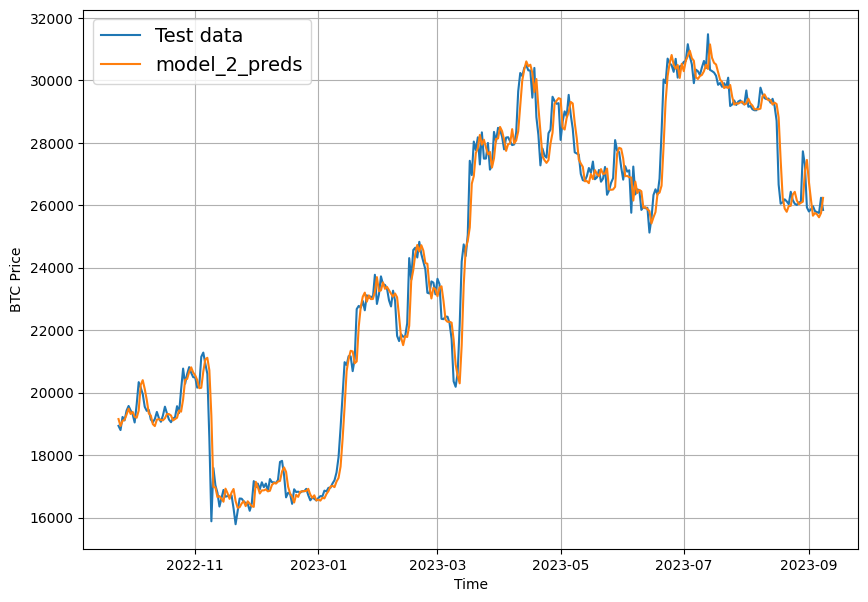

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for test_window offset when plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, format="-", label="Test data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds")

## Model 3: Dense (window = 30, horizon = 7)

In [ ]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(3243, 3243)

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2594, 649, 2594, 649)

In [ ]:
tf.random.set_seed(42)

# Create model (same as model_1 except with different data input and output sizes)
model_3 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON, activation="linear")
], name="model_3_dense")

# Compile model
model_3.compile(loss="MAE",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

In [ ]:
# Evaluate the model on the test data
model_3.evaluate(test_windows, test_labels)

21/21 [==============================] - 0s 2ms/step - loss: 1395.7479


1395.7479248046875

In [ ]:
# Load best version of model_3 and evaluate
model_3 = tf.keras.models.load_model("/content/model_experiments/model_3_dense")
model_3.evaluate(test_windows, test_labels)

21/21 [==============================] - 0s 2ms/step - loss: 1308.7091


1308.7091064453125

In [ ]:
# Make predictions with model_3
model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds[:5]

21/21 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[58179.637, 56789.188, 56808.406, 58558.84 , 59393.562, 57059.918,
        56354.645],
       [57371.36 , 55782.54 , 55983.918, 57145.914, 58296.86 , 56413.34 ,
        56194.72 ],
       [56941.625, 55419.02 , 56522.965, 56930.47 , 55879.332, 55974.992,
        56815.41 ],
       [57384.363, 56332.742, 55779.39 , 56713.156, 55557.16 , 56426.75 ,
        57089.223],
       [54855.74 , 54186.316, 53294.195, 53836.2  , 55098.066, 54684.15 ,
        54727.402]], dtype=float32)>

In [ ]:
model_2_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([54323.77 , 56393.535, 57233.855, 57255.062, 58042.74 ],
      dtype=float32)>

In [ ]:
model_2_results

{'mae': 656.35815,
 'mse': 1027511.3,
 'rmse': 1013.6623,
 'mape': 2.2178073,
 'mase': 1.1276051}

In [ ]:
model_3_preds.shape, model_2_preds.shape

(TensorShape([649, 7]), TensorShape([650]))

In [ ]:
# Evaluate model_3 resutls
model_3_results = evaluate_preds(y_true=test_labels,
                                 y_pred=model_3_preds)
model_3_results

{'mae': array([1827.6595 , 1511.4855 , 1082.8956 , 1536.784  , 2262.7122 ,
        2750.7717 , 3014.484  , 3296.4827 , 4457.5703 , 5538.503  ,
        7181.199  , 5940.1875 , 1591.1306 , 2045.1261 , 1199.3939 ,
        1095.4727 , 1466.5223 , 1738.7087 , 1623.9291 ,  875.9537 ,
        1380.2266 , 1495.1584 , 1609.6897 , 1275.0452 , 1539.3314 ,
        2142.4397 , 3280.0815 , 3664.9731 , 3632.4543 , 2694.8247 ,
        1595.1194 , 1629.6998 , 2102.052  , 2794.1753 , 3430.78   ,
        3076.7986 , 1346.7584 ,  755.9107 , 1805.4392 , 2028.7076 ,
        2500.1758 , 3192.3142 , 3971.832  , 4046.1206 , 1712.6847 ,
        1203.9045 , 1155.8086 , 1661.6752 , 2114.5542 , 2066.5    ,
        1030.1256 ,  480.65457,  790.35657, 1833.408  , 2917.034  ,
        3879.1675 , 4156.882  , 4360.128  , 4879.3125 , 4340.5376 ,
        1191.1044 , 1907.1417 , 2302.5715 , 2351.4644 , 2224.774  ,
        1619.3717 , 1155.5859 , 1253.7455 , 1784.6456 , 2486.306  ,
        2887.2175 , 3867.7996 , 5041.7627

## Make our evaluation function work for larger horizon

In [ ]:
tf.reduce_mean(model_3_results["mae"]).numpy

<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(), dtype=float32, numpy=1308.7089>>

In [ ]:
# Create a function to take in model predictions and truth values and return evaluation metrics
def evaluate_preds(y_true, y_pred):
  # Make sure float32 datatype (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various evaluation metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, we want to reduce metrics to a single value)
  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [ ]:
# Get model_3 results aggregated to single values
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 1308.7089,
 'mse': 3937211.2,
 'rmse': 1507.5094,
 'mape': 4.498732,
 'mase': 2.223354}

In [ ]:
model_1_results, model_2_results, naive_results

({'mae': 614.91064,
  'mse': 922135.8,
  'rmse': 960.279,
  'mape': 2.0791087,
  'mase': 1.0379779},
 {'mae': 656.35815,
  'mse': 1027511.3,
  'rmse': 1013.6623,
  'mape': 2.2178073,
  'mase': 1.1276051},
 {'mae': 593.4614,
  'mse': 879353.06,
  'rmse': 937.7382,
  'mape': 2.0068219,
  'mase': 1.0017713})

We've made and evaluated predictions with `model_3`. let's visualize, visualize, visualize

In [ ]:
model_3_preds[:5]

<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[58179.637, 56789.188, 56808.406, 58558.84 , 59393.562, 57059.918,
        56354.645],
       [57371.36 , 55782.54 , 55983.918, 57145.914, 58296.86 , 56413.34 ,
        56194.72 ],
       [56941.625, 55419.02 , 56522.965, 56930.47 , 55879.332, 55974.992,
        56815.41 ],
       [57384.363, 56332.742, 55779.39 , 56713.156, 55557.16 , 56426.75 ,
        57089.223],
       [54855.74 , 54186.316, 53294.195, 53836.2  , 55098.066, 54684.15 ,
        54727.402]], dtype=float32)>

In [ ]:
test_labels[:]

array([[57569.074219, 56280.425781, 57274.679688, ..., 54815.078125,
        57248.457031, 57806.566406],
       [56280.425781, 57274.679688, 53569.765625, ..., 57248.457031,
        57806.566406, 57005.425781],
       [57274.679688, 53569.765625, 54815.078125, ..., 57806.566406,
        57005.425781, 57229.828125],
       ...,
       [25931.472656, 25800.724609, 25868.798828, ..., 25812.416016,
        25779.982422, 25753.236328],
       [25800.724609, 25868.798828, 25969.566406, ..., 25779.982422,
        25753.236328, 26240.195313],
       [25868.798828, 25969.566406, 25812.416016, ..., 25753.236328,
        26240.195313, 25848.972656]])

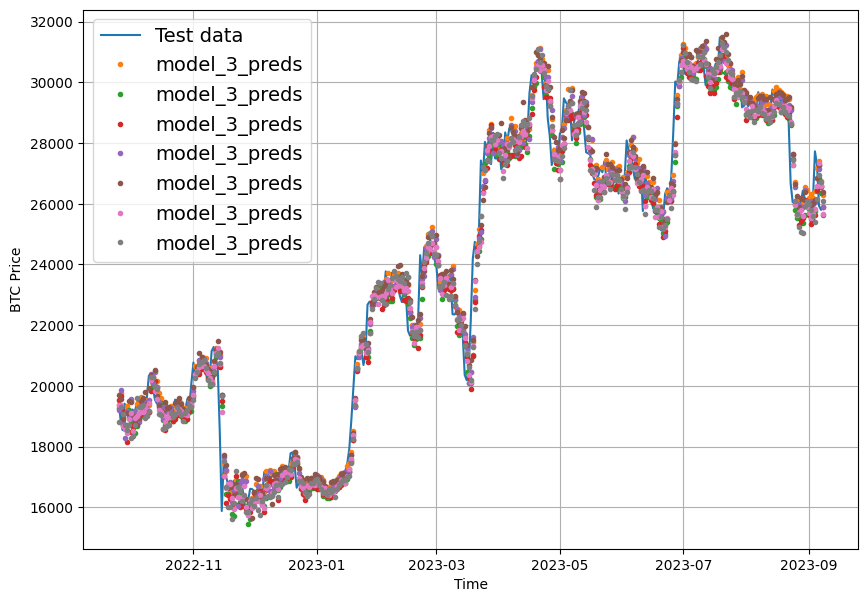

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, format="-", label="Test data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, label="model_3_preds")

In [ ]:
model_3_preds[0]

<tf.Tensor: shape=(7,), dtype=float32, numpy=
array([58179.637, 56789.188, 56808.406, 58558.84 , 59393.562, 57059.918,
       56354.645], dtype=float32)>

In [ ]:
tf.reduce_mean(model_3_preds)

<tf.Tensor: shape=(), dtype=float32, numpy=28782.645>

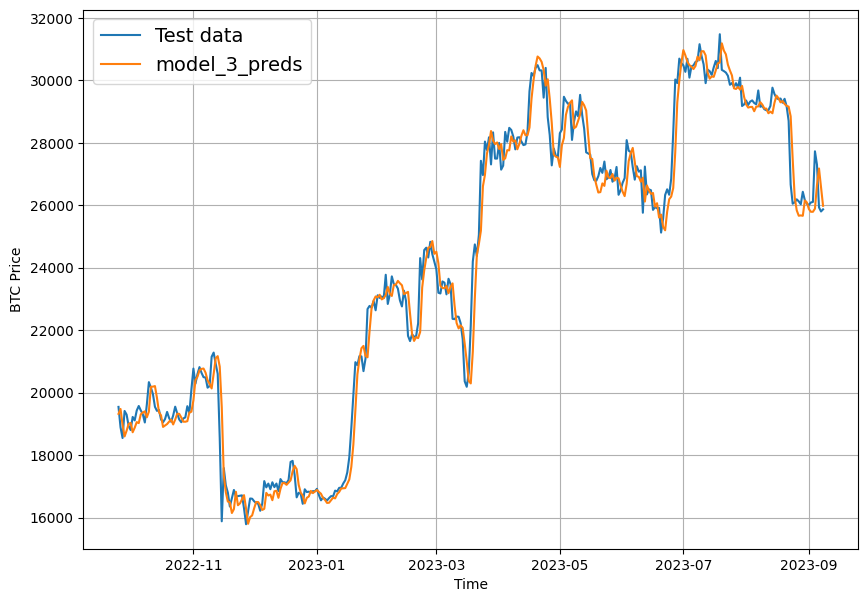

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 format="-",
                 label="Test data")
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=tf.reduce_mean(model_3_preds, axis=1),
                 start=offset,
                 format="-",
                 label="model_3_preds")

## Which of our model's os performing the best so far?

So we've trained a few models, now let's comapre them and see how they've gone...

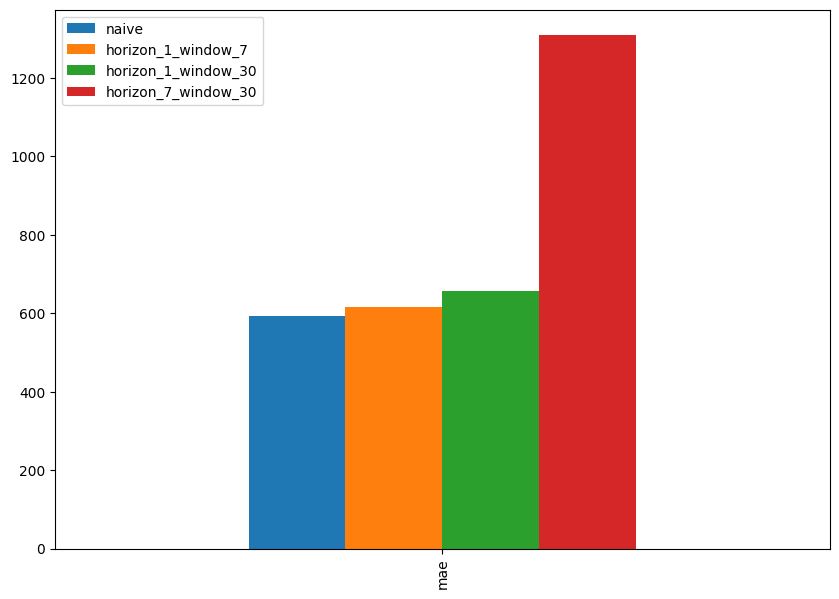

In [ ]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

## Model 4: Conv1D



In [ ]:
HORIZON = 1 # predict nexr day of Bitcoin prices
WINDOW_SIZE = 7 # use previous week worth data

In [ ]:
# Create windowed data
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(3272, 3272)

In [ ]:
# Create train/test sets
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2617, 2617, 655, 655)

To use Conv1D layer, we need an input shape of: `(batch_size, timesteps, input_dim)`.

However our data isn't in that shape yet...

In [ ]:
# Check data input shape
train_windows[0].shape # returns (WINDOWS_SIZE, )

(7,)

In [ ]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([457.334015, 424.440002, 394.79599 , 408.903992, 398.821014,
       402.152008, 435.790985])>

In [ ]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for `input_dims`

In [ ]:
from numpy.lib.shape_base import expand_dims
# Test out our lambda layer
print(f"Original shape: {x.shape}") # (WINDOW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}") # output = ...?
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[457.334]
 [424.44 ]
 [394.796]
 [408.904]
 [398.821]
 [402.152]
 [435.791]]


In [ ]:
tf.random.set_seed(42)

# Create Conv1D model
model_4 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    layers.Conv1D(filters=128, kernel_size=7, strides=1, padding="causal", activation="relu"),
    layers.Dense(HORIZON)
], name="model_4_conv1D")

# Compile model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

In [ ]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            6400      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 6529 (25.50 KB)
Trainable params: 6529 (25.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Evaluate model
model_4.evaluate(test_windows, test_labels)

21/21 [==============================] - 0s 2ms/step - loss: 686.0563


686.0562744140625

In [ ]:
# Load back in best performing Conv1D and re-evaluate
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1D")
model_4.evaluate(test_windows, test_labels)

21/21 [==============================] - 0s 3ms/step - loss: 632.7573


632.7572631835938

In [ ]:
# Make predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

21/21 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([56839.535, 57369.92 , 56634.473, 56848.01 , 54383.5  , 54486.785,
       56470.645, 57572.1  , 57212.457, 57507.977], dtype=float32)>

In [ ]:
# Evaluate predictions
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 632.7572,
 'mse': 972323.94,
 'rmse': 986.0649,
 'mape': 2.135839,
 'mase': 1.0681032}

## Model 5: RNN (LSTM)

Let's build an RNN model for our time series data.

We'll use the same data we created priviously.

In [ ]:
tf.random.set_seed(42)

# Let's build an LSTM model with the Functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
# x = layers.LSTM(128, return_sequences=True)(x)
x = layers.LSTM(128, activation="relu")(x)
# x = layers.Dense(32, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_LSTM")

# Compile
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_5.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=1,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

Epoch 1/100
21/21 [==============================] - 4s 97ms/step - loss: 8243.9023 - val_loss: 15885.7959
Epoch 2/100
21/21 [==============================] - 2s 78ms/step - loss: 3284.6243 - val_loss: 1202.0664
Epoch 3/100
21/21 [==============================] - 2s 103ms/step - loss: 748.2461 - val_loss: 1124.4065
Epoch 4/100
21/21 [==============================] - 0s 7ms/step - loss: 598.0446 - val_loss: 1382.3865
Epoch 5/100
21/21 [==============================] - 0s 8ms/step - loss: 542.5589 - val_loss: 1212.6031
Epoch 6/100
21/21 [==============================] - 0s 8ms/step - loss: 542.7715 - val_loss: 1269.9001
Epoch 7/100
21/21 [==============================] - 1s 72ms/step - loss: 529.1403 - val_loss: 1061.6689
Epoch 8/100
21/21 [==============================] - 0s 7ms/step - loss: 524.7383 - val_loss: 1144.1422
Epoch 9/100
21/21 [==============================] - 0s 7ms/step - loss: 522.3481 - val_loss: 1068.9888
Epoch 10/100
21/21 [==============================] - 1s

In [ ]:
# Load in best version of model 5 and evalaute on the test data
model_5 = tf.keras.models.load_model("/content/model_experiments/model_5_LSTM")
model_5.evaluate(test_windows, test_labels)

21/21 [==============================] - 0s 3ms/step - loss: 643.1801


643.1801147460938

In [ ]:
# Make prediction with our LSTM model
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:5]

21/21 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([57120.207, 57534.453, 56728.785, 56922.934, 54629.996],
      dtype=float32)>

In [ ]:
# Evaluate model 5 predictions
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                               y_pred=model_5_preds)
model_5_results

{'mae': 643.1801,
 'mse': 996870.1,
 'rmse': 998.43384,
 'mape': 2.1735067,
 'mase': 1.0856972}

In [ ]:
model_1_results

{'mae': 614.91064,
 'mse': 922135.8,
 'rmse': 960.279,
 'mape': 2.0791087,
 'mase': 1.0379779}

> 🔑 **Note**: Because neural networks are such powerful algorithms, they can be used for almost any problem, however, that doesn't mean they'll achive performat or usable results. You're probably starting to clue onto this now.

## Make a multivariate time series dataset

Before we add a feature to our time series, waht is a feature we can use?

One feature we could add is whether or not Elon Mask tweeted on that day...

* day 1 - 0
* day 2 - 1
* day 3 - 0

What's a better feature to use?

How about the bitcoin having events?



In [ ]:
# Let's make a multivariate time sereis
bitcoin_prices.head()

,Price
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014


In [ ]:
# Let's add the bitcoin having events to our dataset
block_reward_1 = 50 # 3 January 2009 - this block reward isn't in our dataset (our data starts from September 2014)
block_reward_2 = 25 # 8 November 2012 - not in our dataset
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 18 May 2020
block_reward_5 = 3.125 # Expecting April 2024

# Block reward dates
# block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

In [ ]:
# Create date ranges of where specific block_reward_vlaues should be
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
# block_reward_4_days = (block_reward_5_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(661, 2070)

In [ ]:
# Add in block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

# Add in block_reward values as a feature to our dataframe
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4

In [ ]:
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2014-09-17,457.334015,25
2014-09-18,424.440002,25
2014-09-19,394.795990,25
2014-09-20,408.903992,25
2014-09-21,398.821014,25


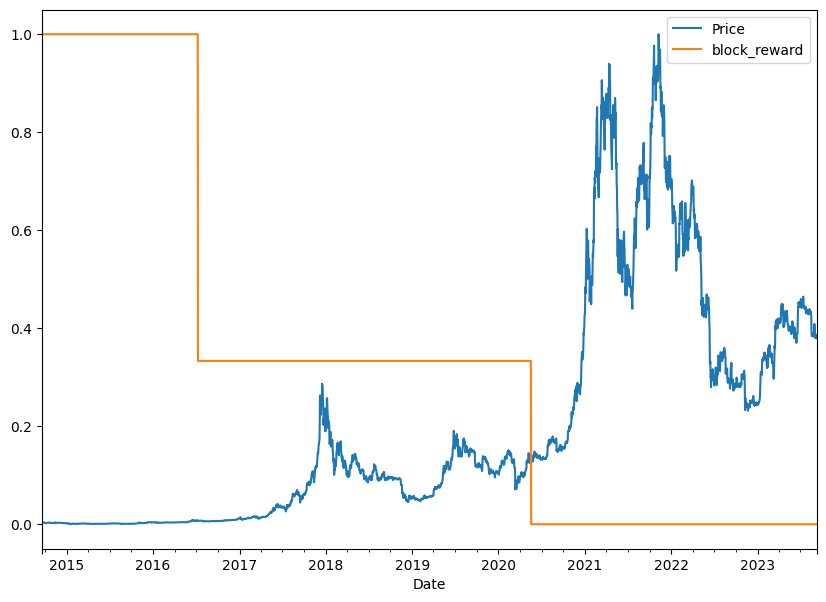

In [ ]:
# Plot the block reward vs price over time
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]),
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10, 7));

## Making a windowed dataset with pandas

Previously, we've turned our univariate time series into windowed dataset using the helper function above.

However, since we've got multivariable data, these functions won't work.

Not to worry, we can use pandas.DataFrame.shift() method to window our multivariate data.


In [ ]:
# Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# Make a copy of the Bitcoin historical data with block_reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # shift values for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2014-09-17,457.334015,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18,424.440002,25,457.334015,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19,394.795990,25,424.440002,457.334015,NaN,NaN,NaN,NaN,NaN
2014-09-20,408.903992,25,394.795990,424.440002,457.334015,NaN,NaN,NaN,NaN
2014-09-21,398.821014,25,408.903992,394.795990,424.440002,457.334015,NaN,NaN,NaN
2014-09-22,402.152008,25,398.821014,408.903992,394.795990,424.440002,457.334015,NaN,NaN
2014-09-23,435.790985,25,402.152008,398.821014,408.903992,394.795990,424.440002,457.334015,NaN
2014-09-24,423.204987,25,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002,457.334015
2014-09-25,411.574005,25,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002


In [ ]:
bitcoin_prices_windowed.tail()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2023-09-04,25812.416016,6.25,25969.566406,25868.798828,25800.724609,25931.472656,27297.265625,27727.392578,26106.150391
2023-09-05,25779.982422,6.25,25812.416016,25969.566406,25868.798828,25800.724609,25931.472656,27297.265625,27727.392578
2023-09-06,25753.236328,6.25,25779.982422,25812.416016,25969.566406,25868.798828,25800.724609,25931.472656,27297.265625
2023-09-07,26240.195313,6.25,25753.236328,25779.982422,25812.416016,25969.566406,25868.798828,25800.724609,25931.472656
2023-09-08,25848.972656,6.25,26240.195313,25753.236328,25779.982422,25812.416016,25969.566406,25868.798828,25800.724609


What we've done is created a way to window our dataset directly form a pandas dataframe.

```
[0, 1, 2, 3, 4, 5, 6, block_reward] -> [7]
[1, 2, 3, 4, 5, 6, 7, block_reward] -> [7]
[2, 3, 4, 5, 6, 7, 8, block_reward] -> [7]
```

In [ ]:
# Create X (windows) and y (horizons) features
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2014-09-24,25.0,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002,457.334015
2014-09-25,25.0,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002
2014-09-26,25.0,411.574005,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990
2014-09-27,25.0,404.424988,411.574005,423.204987,435.790985,402.152008,398.821014,408.903992
2014-09-28,25.0,399.519989,404.424988,411.574005,423.204987,435.790985,402.152008,398.821014


In [ ]:
y.head()

Date
2014-09-24    423.204987
2014-09-25    411.574005
2014-09-26    404.424988
2014-09-27    399.519989
2014-09-28    377.181000
Name: Price, dtype: float32

In [ ]:
# Make train and test sets using indexing
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2617, 2617, 655, 655)

## Model 6: Dense (multivariate time series)

In [ ]:
tf.random.set_seed(42)

# Make multivariate time series model
model_6 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    # layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
], name="model_6_dense_multivariate")

# Compile
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_6.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
            verbose=1,
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

Epoch 1/100
21/21 [==============================] - 1s 28ms/step - loss: 1905.9510 - val_loss: 1124.2742
Epoch 2/100
21/21 [==============================] - 0s 23ms/step - loss: 592.9476 - val_loss: 986.1045
Epoch 3/100
21/21 [==============================] - 0s 22ms/step - loss: 497.8549 - val_loss: 929.7038
Epoch 4/100
21/21 [==============================] - 0s 21ms/step - loss: 445.0003 - val_loss: 842.6275
Epoch 5/100
21/21 [==============================] - 0s 5ms/step - loss: 426.8093 - val_loss: 879.0001
Epoch 6/100
21/21 [==============================] - 0s 21ms/step - loss: 421.3133 - val_loss: 769.0661
Epoch 7/100
21/21 [==============================] - 0s 5ms/step - loss: 395.2639 - val_loss: 781.0045
Epoch 8/100
21/21 [==============================] - 0s 4ms/step - loss: 383.9276 - val_loss: 775.8553
Epoch 9/100
21/21 [==============================] - 0s 22ms/step - loss: 381.3653 - val_loss: 733.1142
Epoch 10/100
21/21 [==============================] - 0s 24ms/ste

In [ ]:
# Evaluate multivariate model
model_6.evaluate(X_test, y_test)

21/21 [==============================] - 0s 2ms/step - loss: 646.0121


646.0121459960938

In [ ]:
# Load in and evaluate best performing model
model_6 = tf.keras.models.load_model("/content/model_experiments/model_6_dense_multivariate")
model_6.evaluate(X_test, y_test)

21/21 [==============================] - 0s 2ms/step - loss: 612.3602


612.3602294921875

In [ ]:
# Make predictions with multivariate model
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

21/21 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([56790.973, 57191.785, 56478.42 , 57083.156, 54209.113, 54451.383,
       56625.824, 57806.477, 57326.555, 57290.926], dtype=float32)>

In [ ]:
# Evaluate predictions to get eval metrics
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results

{'mae': 612.3602,
 'mse': 930442.25,
 'rmse': 964.59436,
 'mape': 2.0725918,
 'mase': 1.0336728}

In [ ]:
model_1_results

{'mae': 614.91064,
 'mse': 922135.8,
 'rmse': 960.279,
 'mape': 2.0791087,
 'mase': 1.0379779}

In [ ]:
naive_results

{'mae': 593.4614,
 'mse': 879353.06,
 'rmse': 937.7382,
 'mape': 2.0068219,
 'mase': 1.0017713}

## Model 7: N-BEATS algorithm

Let's build the biggest (though maybe not the biggest, as in, it perform really well...) time series forecasting model we've built so far.

More specifically, we're going to be replicating the algorithm in the following paper

Why?

* This will allow us to practice replicating a paper with TensorFlow code.
* We will see how to use TensorFlow layer subclassing (to make our own custom layers).
* Get experience using the Functional API
to create a custom architecture.
* Potentially get state of the art results on our problem.

### Building and testing the N-BEATS block layer

Beacause the N-BEATS block layer doesn't exist in TensorFlow, we've got to create it.

To create custom layers and models in TensorFlow we can use subclassing

In [ ]:
# Create NBeatsBlock custom layer
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self, # the constructor takes all the hyperparameters for the layer
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # the **kwargs argument takes care of all of the arguments for the parent class (input_shape, trainable, name)
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs): # the call method is what runs when the layer is called
    x = inputs
    for layer in self.hidden: # pass inputs through each hidden layer
      x = layer(x)
    theta = self.theta_layer(x)
    # Output the backcast and forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

Let's test our NBeatBlock class.

To do we'll make some dummy inputs and outputs.

In [ ]:
# Set up dummy NBeatsBlock layer to represent inputs and outputs
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON, # backcast + forecast
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [ ]:
# Create dummy inputs (have to be same size as input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0) # input shape to the model has to reflect Dense layer input requirements (ndim=2)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [ ]:
# Pass dummy inputs to dummy NBeatsBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [-0.2709712   0.1401731  -0.23293218  0.25488186  0.1672926   0.09206301
 -0.21065377]
Forecast: -1.0018196105957031


### Preparing data for the N-BEATS algorithms using tf.data

To make our input data load as fast as possible we're going to be a adhering to the prformant data pipline steps in the tf.data guide.

In [ ]:
HORIZON = 1 # How many predict
WINDOW_SIZE = 7 # Hom many train

In [ ]:
# Create NBEATS data inputs (N-BEATS works with univeriate time series)
bitcoin_prices.head()

,Price
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014


In [ ]:
# Add windowed columns
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.dropna().head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2014-09-24,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002,457.334015
2014-09-25,411.574005,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002
2014-09-26,404.424988,411.574005,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990
2014-09-27,399.519989,404.424988,411.574005,423.204987,435.790985,402.152008,398.821014,408.903992
2014-09-28,377.181000,399.519989,404.424988,411.574005,423.204987,435.790985,402.152008,398.821014


In [ ]:
# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2617, 2617, 655, 655)

In [ ]:
# 1. Turn train and test arrays into tensor Datasets
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# 2. Combine features & labels
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

### Setting up hyperparameters for N-BEATS algoritm

* Lookback Period = train = WINDOW_SIZE
* Forecast Period = predict = HORIZON

The N-BEATS algorithms has a fair few number of parameters, many of them can be found in Table 18.

In [ ]:
# Values from N-BEATS paper
N_EPOCHS = 5000 # Iterations
N_NEURONS = 512 # Width (how many hidden units) = in deep for hidden layer
N_LAYERS = 4 # Block (how many hidden layers) = in across for hidden layer
N_STACKS = 30 # Stacks

INPUT_SIZE = WINDOW_SIZE * HORIZON # Lookback period (trainible period)
THETA_SIZE = INPUT_SIZE + HORIZON # Forecast period

INPUT_SIZE, THETA_SIZE

(7, 8)

### Getting ready for residual connections

Before we can craft our N-BEATS model, we need two layers for the residual connections (subtract and add).

The N-BEATS algorithm uses double residual stacking to help train its deeper architecture (section 3.2 of N-BEATS paper).

For more on residual conncection see:

And here:

In [ ]:
# Make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Subtract
subtracted = layers.subtract([tensor_1, tensor_2])

# Add
added = layers.add([tensor_1, tensor_2])

print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")


Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


### Building, compiling and fitting the N-BEATS algorithm

1. Setup an instance of the N-BEATS block layer using `NBeatsBlock` (this'll be initial block used for the network, the rest will be created as part of stacks).
2. Create an input layer for the N-BEATS stack (we'll be using the Keras Functial API).
3. Make the initial backcast and forecast for the model with the layer created in (1).
4. Use for loop to create stacks of block layers.
5. Use the `NBeatsBlockz` class within the for loop in (4) to create blocks which return backcast and block-level forecast.
6. Create the double residual stacking using subtract and add layers.
7. Put the model inputs and outputs together using `tf.keras.Model()`.
8. Compile the model with MAE loss (the paper uses multiple losses but we'll use MAE to keep it inline with our other models) and Adam optimizer with default setting as per section 5.2 of N-BEATS paper.
9. Fit the N-BEATS model for 5000 epochs and since it's fitting for so many epochs, we'll use a couple of callbacks:
 * Early Stopping - because the model will be training for so long, we'll stop it early if it stops improving.
 * Reduce LR on Plateau - if a model stops improving, try lowering the learning to reduce the amount it updates its weights each time (take smaller steps towards best performance).

In [ ]:
%%time

tf.random.set_seed(42)

# 1. Setup N-BEATS Block layer
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# 2. Create input to stacks
stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

# 3. Create initial backcast and forecast input (backwards predictions are referred to as residuals in the paper)
backcast, forecast = nbeats_block_layer(stack_input)
# Add in subtraction residual link, thank you to: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/174
residuals = layers.subtract([stack_input, backcast], name=f"subtract_00")

# 4. Create stacks of blocks
for i, _ in enumerate(range(N_STACKS-1)): # first stack is already creted in (3)

  # 5. Use the NBeatsBlock to calculate the backcast as well as block forecast
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals) # pass it in residuals (the backcast)

  # 6. Create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. Put the stack model together
model_7 = tf.keras.Model(inputs=stack_input,
                         outputs=forecast,
                         name="model_7_N-BEATS")

# 8. Compile with MAE loss and Adam optimizer
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["mae", "mse"])

# 9. Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0, # prevent large amounts of training outputs
            # callbacks=[create_model_checkpoint(model_name=stack_model.name)] # saving model every epoch consumes far too much time
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])


Epoch 205: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 305: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
CPU times: user 1min 48s, sys: 2.3 s, total: 1min 50s
Wall time: 1min 59s


In [ ]:
# Evaluate N-BEATS model on the test dataset
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 27ms/step - loss: 609.9675 - mae: 609.9675 - mse: 935374.6875


[609.967529296875, 609.967529296875, 935374.6875]

In [ ]:
# Make predictions with N-BEATS model
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

1/1 [==============================] - 2s 2s/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([57240.934, 57196.35 , 56479.055, 57171.203, 54813.8  , 54683.473,
       56788.758, 57320.62 , 56998.664, 56886.223], dtype=float32)>

In [ ]:
# Evaluate N-BEATS model preds
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results

{'mae': 609.9675,
 'mse': 935374.7,
 'rmse': 967.1477,
 'mape': 2.0614433,
 'mase': 1.0296339}

In [ ]:
model_1_results

{'mae': 614.91064,
 'mse': 922135.8,
 'rmse': 960.279,
 'mape': 2.0791087,
 'mase': 1.0379779}

In [ ]:
naive_results

{'mae': 593.4614,
 'mse': 879353.06,
 'rmse': 937.7382,
 'mape': 2.0068219,
 'mase': 1.0017713}

### Plotting the N-BEATS architecture we've created

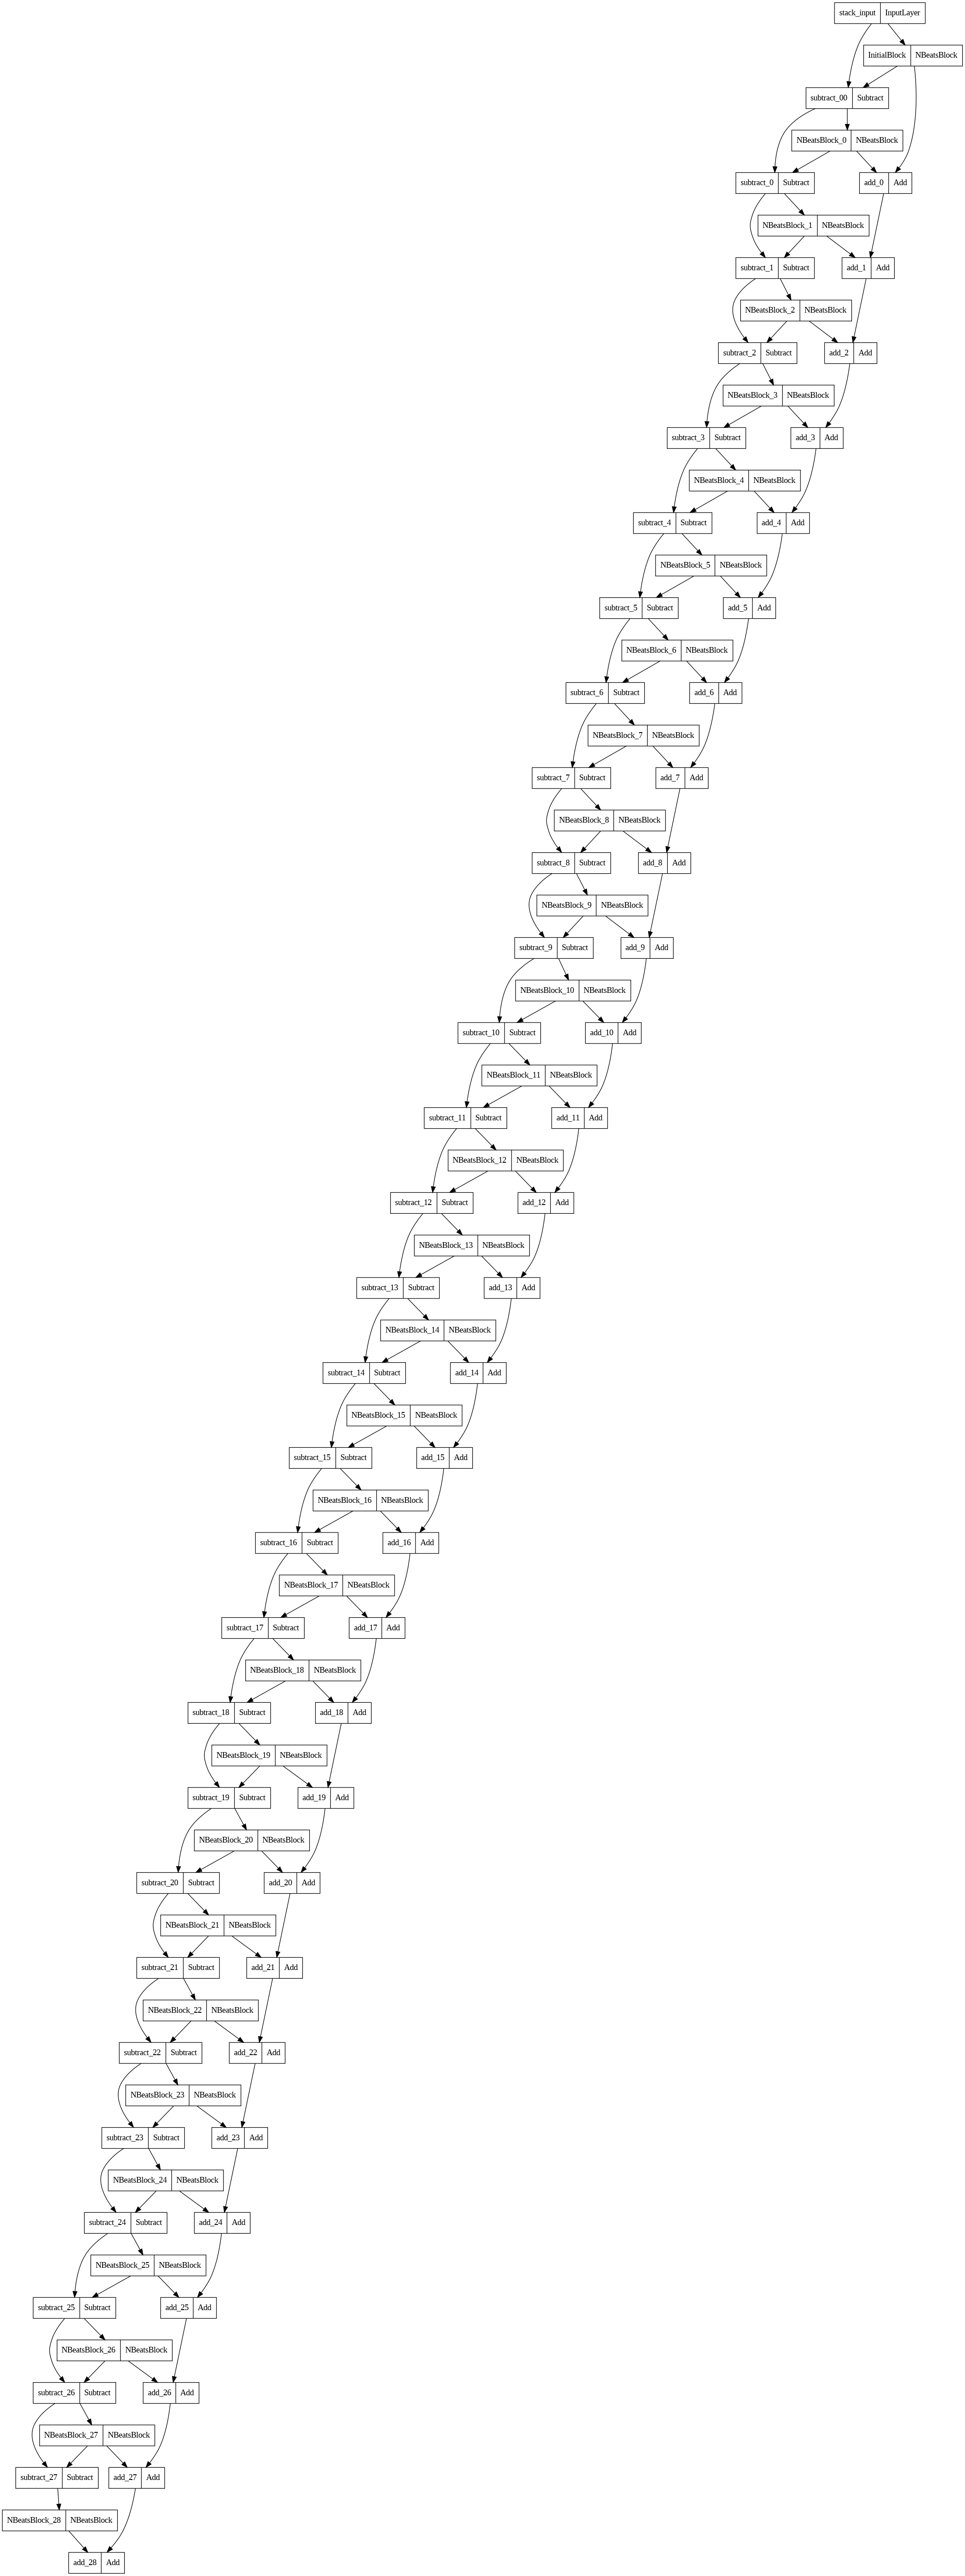

In [ ]:
# Plot the N-BEATS model and inspect the architecture
from tensorflow.keras.utils import plot_model
plot_model(model_7)

## Model 8: Creating an ensemble (stacking different models together)

An ensemble leverages the wisdom of the crowd effect.

It combines many different models to predict a common goal.

In [ ]:
HORIZON, WINDOW_SIZE

(1, 7)

### Constructing and fitting and ensemble of models (using different loss functions)

In [ ]:
def get_ensemble_models(horizon=HORIZON,
                       train_data=train_dataset,
                       test_data=test_dataset,
                       num_iter=10,
                       num_epochs=1000,
                       loss_fns=["mae", "mse", "mape"]):
  """
  Returns a list of num_iter models each trained on MAE, MSE and MAPE loss.

  For example, if num_iter=10, a list of 30 trained models will be returned:
  10 * len(["mae", "mse", "mape"]).
  """
  # Make empty list of trained ensemble models
  ensemble_models = []

  # Create num_iter number of models per loss function
  for i in range(num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} fot {num_epochs} epochs, model number: {i}")

      # Construct a simple model (similar to model_1)
      model = tf.keras.Sequential([
          # Initialize dense layers with normal distribution for estimating prediction intervals later on
          layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
          layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
          layers.Dense(HORIZON)
      ])

      # Compile simple model with current loss function
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])

      # Fit the current model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])

      # Append fitted model to list of ensemble models
      ensemble_models.append(model)

  return ensemble_models

In [ ]:
%%time
# Get list of trained ensemble models
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae fot 1000 epochs, model number: 0

Epoch 878: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mse fot 1000 epochs, model number: 0

Epoch 321: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 421: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape fot 1000 epochs, model number: 0

Epoch 204: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 315: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 415: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mae fot 1000 epochs, model number: 1
Optimizing model by reducing: mse fot 1000 epochs, model number: 1

Epoch 715: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 815: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by redu

### Make predictions with our ensemble model

In [ ]:
# Create a function which uses a list of trained models to make and return of predictions
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [ ]:
# Create a list of ensemble predictions
%%time
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)

1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 48ms/step
CPU times: user 748 ms, sys: 31 ms, total: 778 ms
Wall time: 982 ms


In [ ]:
ensemble_preds

<tf.Tensor: shape=(15, 655), dtype=float32, numpy=
array([[56780.766, 56263.84 , 57090.79 , ..., 25689.318, 25732.701,
        26230.436],
       [55976.727, 57437.477, 56093.773, ..., 25678.32 , 25706.447,
        26114.695],
       [56186.312, 57215.668, 56039.574, ..., 25671.965, 25666.629,
        26220.541],
       ...,
       [57069.047, 57034.426, 56231.18 , ..., 25778.547, 25660.475,
        26090.51 ],
       [56717.805, 56902.367, 55951.58 , ..., 25583.31 , 25671.543,
        26144.66 ],
       [56213.887, 57317.305, 56242.56 , ..., 25697.498, 25736.63 ,
        26231.775]], dtype=float32)>

Our ensemble preds come out in multiple dimensions but to combine into **point prediction** we can leverage the mean of all of the predictions or the median

In [ ]:
ensemble_mean = tf.reduce_mean(ensemble_preds, axis=0)
ensemble_mean[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([56791.62 , 57430.33 , 56642.42 , 57599.496, 54140.727, 54901.5  ,
       57248.25 , 58017.508, 57398.355, 57375.934], dtype=float32)>

In [ ]:
import numpy as np

ensemble_median = np.median(ensemble_preds, axis=0)
ensemble_median[:10]

array([56489.83 , 57206.73 , 56242.56 , 57348.99 , 53690.69 , 54793.16 ,
       57086.48 , 57740.016, 57058.094, 57118.113], dtype=float32)

In [ ]:
# Evaluate ensemble model predictions
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=ensemble_mean)
ensemble_results

{'mae': 617.1569,
 'mse': 934512.25,
 'rmse': 966.7017,
 'mape': 2.095541,
 'mase': 1.0417697}

In [ ]:
# Evaluate ensemble model predictions
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=ensemble_median)
ensemble_results

{'mae': 595.9717,
 'mse': 887793.06,
 'rmse': 942.2277,
 'mape': 2.015002,
 'mase': 1.0060087}

In [ ]:
model_1_results

{'mae': 614.91064,
 'mse': 922135.8,
 'rmse': 960.279,
 'mape': 2.0791087,
 'mase': 1.0379779}

### Plotting the prediction intervals (uncertainty estimates) of our ensemble

So far we've been making point predictions with our models.

E.g. horizon = 1, our model predicts tomorrow's price of Bitcoin will $50,000USD

Wouldn't it be helpful if we knew a range of where that prediction came from?

Instead of 50,000 USD on teh dot, how about 48,000 to 52,000 USD?

One way to get the 95% confidence prediction intervals for a deep learning model is the bootstrap method:
1. Take the predictions from a number of randomly initialzed models (we've got this thanks to our ensemble models)
2. Measure the standart deviation of the predictions
3. Multiply the standart deviation by 1.96 (assuming the distribution is Gaussian/Normal, 95% of observations fall within 1.96 standart deviations of the mean)
4. To the get the predition interval upper and lower bounds, add and subtract the value obtained in (3) to the mean/median of the predictions made in (1)

In [ ]:
# Find upper and lower bounds of ensemble predictions
def get_upper_lower(preds): # 1. Take the predictions from a numebr of randomly initializer models

  # 2. Measure the standart deviation of the predictions
  std = tf.math.reduce_std(preds, axis=0)

  # 3. Multiply the standart deviation by 1.96
  interval = 1.96 * std

  # 4. Get the prediction interval upper and lower bounds
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval

  return lower, upper

In [ ]:
# Get the upper and lower bounds of the 95% percnet prediction interval
lower, upper = get_upper_lower(preds=ensemble_preds)

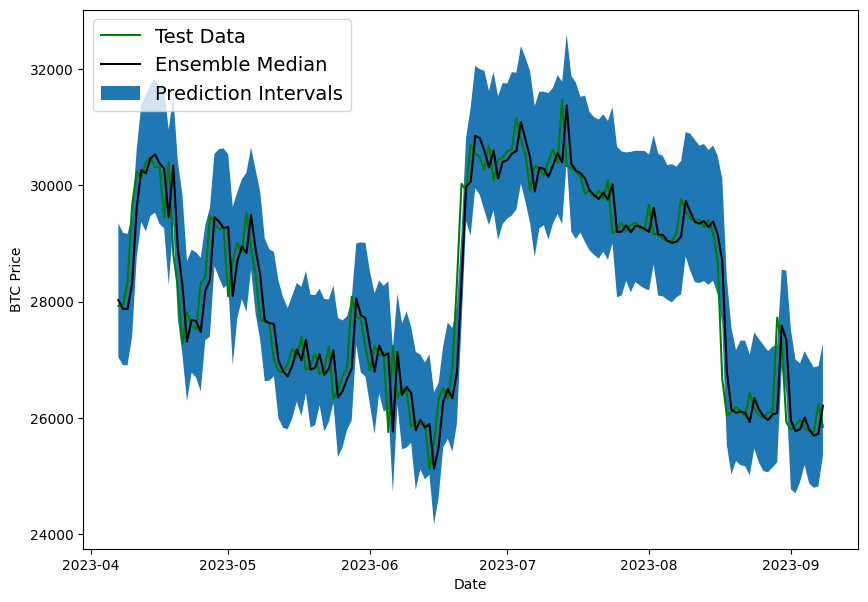

In [ ]:
# Get the median/mean values of our ensemble preds
ensemble_media = np.median(ensemble_preds, axis=0)

# Plot the median of our ensemble preds along with the prediction intervals (where the predictions fall between)
offset=500
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
# To plot the upper and lower bounds, let's use fill_between
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:], label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14);

Hmm...

So far all of our models predictions have been lagging behind the test data...

As is they're replicating what the naive model does and just predict the previous timestep as the next timestep.

> 🔑 **Note**: These prediction inetrvals are estimates themselves. And they have been created with the assumption that our model's data is from a normal distribution.

## Aside: two types of uncertainty (coconut and subway)

Uncertainty estimates in machine learning seek put to qualitatively and quantitatively answer the questions:
1. What can my model know? (with perfect data, what's possible for a model to learn?)
2. What doesn't my model know? (what can a model never predict? Or would it helful if model could tell you that when it's making a prediction, it doesn't actually know if it's right or not?)

There are two major types of uncertainty in machine learning you should know about:
* **Aleatoric uncertainty** - this type of uncertainty cannot be reduced and it is often referred as "data" uncertainty or "subway" uncertainty
* **Epistemic uncertainty** - this type of uncertainty can be reduced, it also reffered to as "model" or "coconut" uncertainty

## Model 9: Train a model of full hitstorical data to make predictions into the future

So far all of our models have predicted on the test dataset, however, this is only a pseudofuture.

Let's now build a model which is capable of predicting into the future!

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2014-09-17,457.334015,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18,424.440002,25,457.334015,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19,394.795990,25,424.440002,457.334015,NaN,NaN,NaN,NaN,NaN
2014-09-20,408.903992,25,394.795990,424.440002,457.334015,NaN,NaN,NaN,NaN
2014-09-21,398.821014,25,408.903992,394.795990,424.440002,457.334015,NaN,NaN,NaN


In [ ]:
bitcoin_prices_windowed.tail()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2023-09-04,25812.416016,6.25,25969.566406,25868.798828,25800.724609,25931.472656,27297.265625,27727.392578,26106.150391
2023-09-05,25779.982422,6.25,25812.416016,25969.566406,25868.798828,25800.724609,25931.472656,27297.265625,27727.392578
2023-09-06,25753.236328,6.25,25779.982422,25812.416016,25969.566406,25868.798828,25800.724609,25931.472656,27297.265625
2023-09-07,26240.195313,6.25,25753.236328,25779.982422,25812.416016,25969.566406,25868.798828,25800.724609,25931.472656
2023-09-08,25848.972656,6.25,26240.195313,25753.236328,25779.982422,25812.416016,25969.566406,25868.798828,25800.724609


In [ ]:
# Train model on entire data to make predictions for the next day
X_all = bitcoin_prices_windowed.dropna().drop(["Price", "block_reward"], axis=1).to_numpy()
# Get labels
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()

len(X_all), len(y_all)

(3272, 3272)

In [ ]:
X_all[:5], y_all[:5]

(array([[435.790985, 402.152008, 398.821014, 408.903992, 394.79599 ,
         424.440002, 457.334015],
        [423.204987, 435.790985, 402.152008, 398.821014, 408.903992,
         394.79599 , 424.440002],
        [411.574005, 423.204987, 435.790985, 402.152008, 398.821014,
         408.903992, 394.79599 ],
        [404.424988, 411.574005, 423.204987, 435.790985, 402.152008,
         398.821014, 408.903992],
        [399.519989, 404.424988, 411.574005, 423.204987, 435.790985,
         402.152008, 398.821014]]),
 array([423.204987, 411.574005, 404.424988, 399.519989, 377.181   ]))

In [ ]:
# Turn data into efficient running tensors

features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# Combine features and labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# Batch and prefetch for optimal performance
BATCH_SIZE = 1024
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [ ]:
tf.random.set_seed(42)

# Create model (nice and simple)
model_9 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
], name="model_9_future_model")

# Compile the model
model_9.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

# Fit model on all of the data to make futer forecasts
model_9.fit(dataset_all,
            epochs=100,
            verbose=0)

### Make predictions into future

In [ ]:
# How many time steps to predict into the future?
INTO_FUTURE = 14

To make predictions into the future we want a function which:

1. Takes as input:
 * a list of values (Bitcoin historical data)
 * a trained model (such as `model_9`)
 * a window into the future to predict (our `INTO_FUTURE` variable)
 * the window size a model was trained on (`WINDOW_SIZE`) - the model can only predict on the same kind of data it was trained on
2. Creates an empty list for future forecast (this will be returned at the end, when it's full of predictions) and extracts the last `WINDOW_SIZE` valeus from the input values
3. Let's `INTO_FUTURE` times making a prediction on `WINDOW_SIZE` sequences which update to remove the first value and append the latest prediction

In [ ]:
tf.expand_dims(y_all[-WINDOW_SIZE:], axis=0), y_all[-WINDOW_SIZE:]

(<tf.Tensor: shape=(1, 7), dtype=float64, numpy=
 array([[25868.798828, 25969.566406, 25812.416016, 25779.982422,
         25753.236328, 26240.195313, 25848.972656]])>,
 array([25868.798828, 25969.566406, 25812.416016, 25779.982422,
        25753.236328, 26240.195313, 25848.972656]))

In [ ]:
# 1. Create function to make predictions into the future
def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  """
  Make future forecasting into_future steps after valeus ends.

  Returns future forecast as a list of floats.
  """
  # 2. Create an empty list for future forecsat/prepare data to forecast on
  future_forecast = []
  last_window = values[-WINDOW_SIZE:]

  # 3. Make INTO_FUTURE number of predictions, altering the data which gets predicted on each
  for _ in range(INTO_FUTURE):
    # Predict on the last window then append it again, again, again (our model will evetually start to make forecast on its own forecasts)
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on:\n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")

    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())

    # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]

  return future_forecast

In [ ]:
# Make forecast into the future
future_forecast = make_future_forecast(values=y_all,
                                       model=model_9,
                                       into_future=INTO_FUTURE,
                                       window_size=WINDOW_SIZE)

1/1 [==============================] - 0s 19ms/step
Predicting on:
 [25868.798828 25969.566406 25812.416016 25779.982422 25753.236328
 26240.195313 25848.972656] -> Prediction: 25750.560546875

1/1 [==============================] - 0s 20ms/step
Predicting on:
 [25969.566406   25812.416016   25779.982422   25753.236328
 26240.195313   25848.972656   25750.56054688] -> Prediction: 25820.455078125

1/1 [==============================] - 0s 17ms/step
Predicting on:
 [25812.416016   25779.982422   25753.236328   26240.195313
 25848.972656   25750.56054688 25820.45507812] -> Prediction: 25717.72265625

1/1 [==============================] - 0s 21ms/step
Predicting on:
 [25779.982422   25753.236328   26240.195313   25848.972656
 25750.56054688 25820.45507812 25717.72265625] -> Prediction: 25754.70703125

1/1 [==============================] - 0s 19ms/step
Predicting on:
 [25753.236328   26240.195313   25848.972656   25750.56054688
 25820.45507812 25717.72265625 25754.70703125] -> Prediction:

### Plot future forecast

In [ ]:
future_forecast

[25750.56,
 25820.455,
 25717.723,
 25754.707,
 25843.166,
 25902.508,
 25692.45,
 25670.209,
 25700.74,
 25663.104,
 25708.592,
 25733.459,
 25678.994,
 25584.973]

In [ ]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values ranging from start_date to start_date+into_future
  """
  start_date = start_date + np.timedelta64(offset, "D") # specify start date, "D" stands for day
  end_date = start_date + np.timedelta64(into_future, "D") # specify end date
  return np.arange(start_date, end_date, dtype="datetime64[D]") # return a date range between start and end date

In [ ]:
# Last tiemstep of timestep (currently np.datetime64 format)
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2023-09-08 00:00:00')

In [ ]:
# Get next to week of timesteps
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2023-09-09', '2023-09-10', '2023-09-11', '2023-09-12',
       '2023-09-13', '2023-09-14', '2023-09-15', '2023-09-16',
       '2023-09-17', '2023-09-18', '2023-09-19', '2023-09-20',
       '2023-09-21', '2023-09-22'], dtype='datetime64[D]')

In [ ]:
# Insert last timestep/final price into next time steps and future forecast so the plot doesn't look janky
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])
next_time_steps, future_forecast

(array(['2023-09-08', '2023-09-09', '2023-09-10', '2023-09-11',
        '2023-09-12', '2023-09-13', '2023-09-14', '2023-09-15',
        '2023-09-16', '2023-09-17', '2023-09-18', '2023-09-19',
        '2023-09-20', '2023-09-21', '2023-09-22'], dtype='datetime64[D]'),
 array([25848.973, 25750.56 , 25820.455, 25717.723, 25754.707, 25843.166,
        25902.508, 25692.45 , 25670.209, 25700.74 , 25663.104, 25708.592,
        25733.459, 25678.994, 25584.973], dtype=float32))

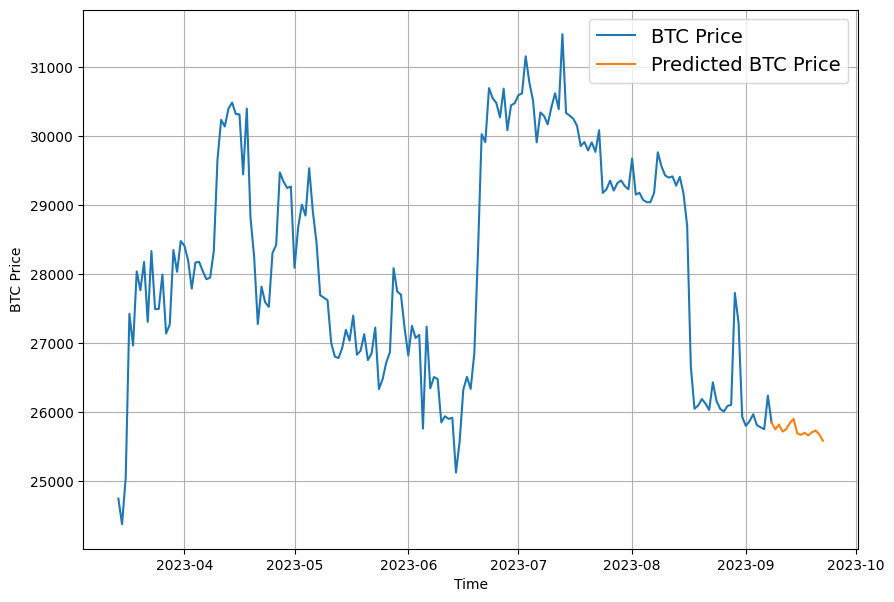

In [ ]:
# Plot future prices predictions of Bitcoin
plt.figure(figsize=(10, 7))
plot_time_series(bitcoin_prices.index, btc_price, start=3100, format="-", label="BTC Price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BTC Price")

## Model 10: Why forecasting is BS (the turkey problem 🦃)

In [ ]:
# Let's introduce a turkey problem to our BTC data (price of BTC falls 100x in one day)
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1] / 100

In [ ]:
# Manufacure an extra price on the end (to showcse our Turkey problem)
btc_price_turkey[-10:]

[27297.265625,
 25931.472656,
 25800.724609,
 25868.798828,
 25969.566406,
 25812.416016,
 25779.982422,
 25753.236328,
 26240.195313,
 258.48972656]

In [ ]:
# Get the timesteps for the turkey problem
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10:]

array(['2023-08-30T00:00:00.000000000', '2023-08-31T00:00:00.000000000',
       '2023-09-01T00:00:00.000000000', '2023-09-02T00:00:00.000000000',
       '2023-09-03T00:00:00.000000000', '2023-09-04T00:00:00.000000000',
       '2023-09-05T00:00:00.000000000', '2023-09-06T00:00:00.000000000',
       '2023-09-07T00:00:00.000000000', '2023-09-08T00:00:00.000000000'],
      dtype='datetime64[ns]')

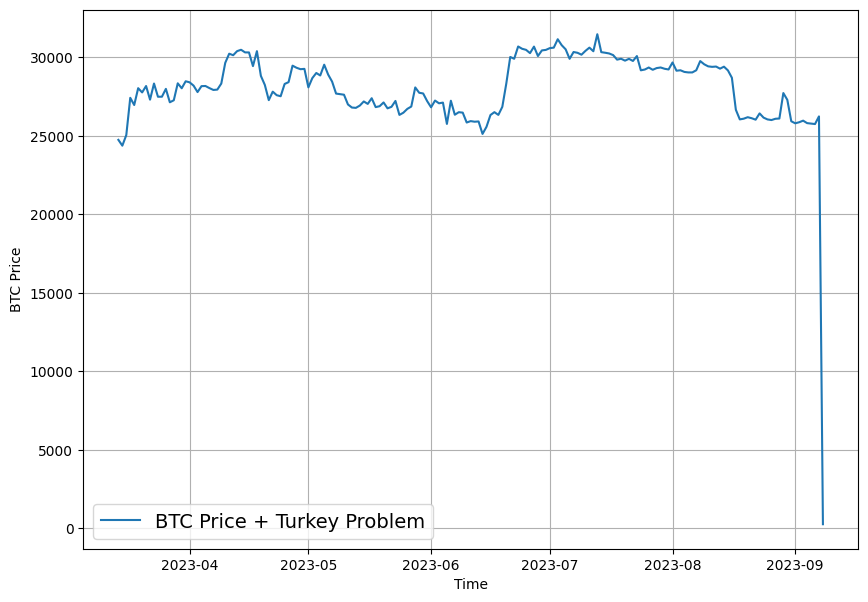

In [ ]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=btc_timesteps_turkey,
                 values=btc_price_turkey,
                 format="-",
                 label="BTC Price + Turkey Problem",
                 start=3100)

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# Create train and test sets for turkey problem data
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size=WINDOW_SIZE, horizon=HORIZON)

X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)
len(X_train), len(X_test), len(y_train), len(y_test)

(2617, 655, 2617, 655)

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1024      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1153 (4.50 KB)
Trainable params: 1153 (4.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Build a turkey model (model to predict on turkey data)

In [ ]:
# Clone model 1 architecture for turkey model and fit the turkey model on the turkey data
turkey_model = tf.keras.models.clone_model(model_1)
turkey_model._name = "model_10_turkey_model"
turkey_model.compile(loss="mae",
                     optimizer=tf.keras.optimizers.Adam())
turkey_model.fit(X_train, y_train,
                 epochs=100,
                 verbose=0,
                 batch_size=128,
                 validation_data=(X_test, y_test),
                 callbacks=[create_model_checkpoint(turkey_model.name)])

In [ ]:
# Evaluate model on test data
turkey_model.evaluate(X_test, y_test)

21/21 [==============================] - 0s 9ms/step - loss: 643.8400


643.8400268554688

In [ ]:
# Load best performing turkey model and evaluate on test data
turkey_model = tf.keras.models.load_model("/content/model_experiments/model_10_turkey_model")
turkey_model.evaluate(X_test, y_test)

21/21 [==============================] - 0s 4ms/step - loss: 643.8400


643.8400268554688

In [ ]:
# Make predictions with turkey model
turkey_preds = make_preds(turkey_model, X_test)
turkey_preds[:10]

21/21 [==============================] - 1s 9ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([56504.13 , 57268.64 , 56548.016, 57125.176, 53946.426, 54502.87 ,
       56890.25 , 57931.71 , 57151.824, 57243.55 ], dtype=float32)>

In [ ]:
# Evaluate turkey preds
turkey_results = evaluate_preds(y_true=y_test,
                                y_pred=turkey_preds)
turkey_results

{'mae': 10746.016,
 'mse': 191217940.0,
 'rmse': 13276.484,
 'mape': 55.940716,
 'mase': 17.015541}

In [ ]:
model_1_results

{'mae': 614.91064,
 'mse': 922135.8,
 'rmse': 960.279,
 'mape': 2.0791087,
 'mase': 1.0379779}

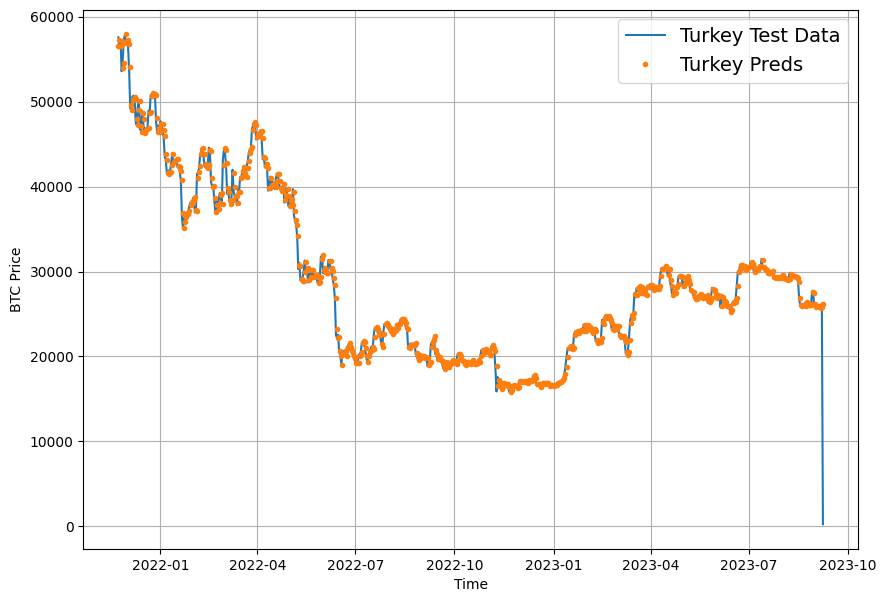

In [ ]:
plt.figure(figsize=(10, 7))
offset=0
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=btc_price_turkey[-len(y_test):],
                 format="-",
                 label="Turkey Test Data",
                 start=offset)
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=turkey_preds,
                 label="Turkey Preds",
                 start=offset);

In [ ]:
len(bitcoin_prices)

3279

## Compare models

In [ ]:
# Compare different model results (w = window, h = horizon, e.g. w=7 means a window size = 7)
model_results = pd.DataFrame({"naive_model": naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30_h7": model_2_results,
                              "model_3_dense_w30_h1": model_3_results,
                              "model_4_Conv1D": model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_multivariate": model_6_results,
                              "model_7_NBEAT": model_7_results,
                              "model_8_ensemble": ensemble_results,
                              "model_10_turkey": turkey_results}).T

model_results

,mae,mse,rmse,mape,mase
naive_model,593.461426,8.793531e+05,937.738220,2.006822,1.001771
model_1_dense_w7_h1,614.910645,9.221358e+05,960.278992,2.079109,1.037978
model_2_dense_w30_h7,656.358154,1.027511e+06,1013.662292,2.217807,1.127605
model_3_dense_w30_h1,1308.708862,3.937211e+06,1507.509399,4.498732,2.223354
model_4_Conv1D,632.757202,9.723239e+05,986.064880,2.135839,1.068103
model_5_LSTM,643.180115,9.968701e+05,998.433838,2.173507,1.085697
model_6_multivariate,612.360229,9.304422e+05,964.594360,2.072592,1.033673
model_7_NBEAT,609.967529,9.353747e+05,967.147705,2.061443,1.029634
model_8_ensemble,595.971680,8.877931e+05,942.227722,2.015002,1.006009
model_10_turkey,10746.015625,1.912179e+08,13276.484375,55.940716,17.015541


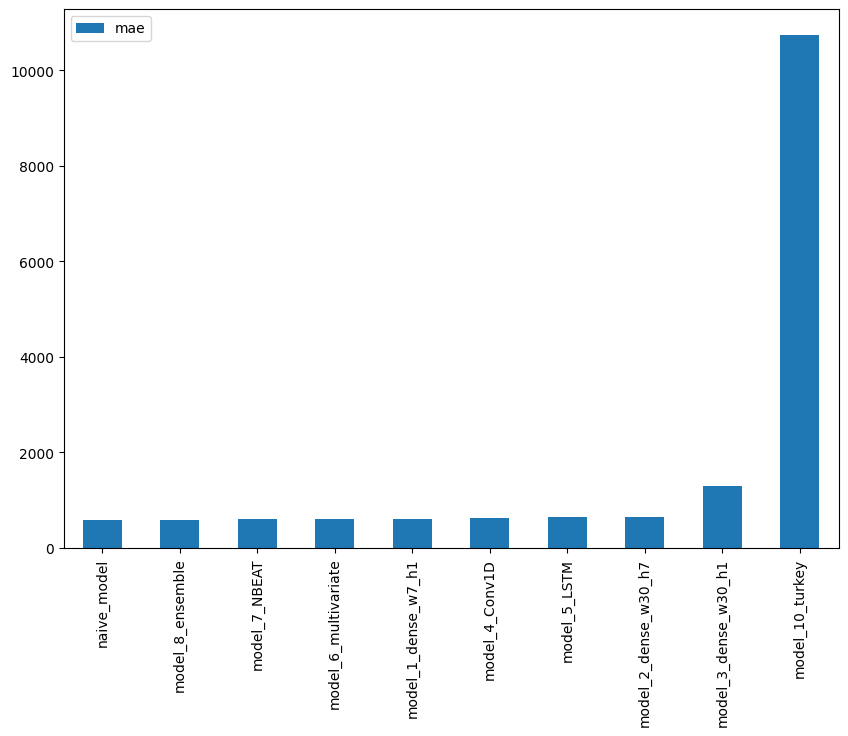

In [ ]:
# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar");